## ENERGY CONSUMPTION - PROJECT

The objective of this project is to develop a predictive model for estimating energy consumption based on building characteristics and environmental factors. The dataset includes features such as building type, square footage, number of occupants, number of appliances, average temperature, and day of the week. A Linear Regression model was chosen for this task to analyze the relationship between these features and energy consumption and to provide accurate predictions that could assist in energy management strategies.Libraries such as NumPy,Pandas,Matplotlib,Seaborn and scikit-Learn were utilized for data analysis,Visualization, and model development.

Dependent Variable(Target)-
Energy Consumption: This is the variable the model aims to predict based on input features.

#### Importing dataset and libraries

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
df=pd.read_csv(r"C:\Users\Madhuma k\Downloads\energy_data.csv")
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


#### Information about Data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


#### Finding Null values

In [3]:
df.isna().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

#### Replacing space in columns

In [4]:
#replacing space
df.columns=df.columns.str.replace(" ","_")
print(df.columns)

Index(['Building_Type', 'Square_Footage', 'Number_of_Occupants',
       'Appliances_Used', 'Average_Temperature', 'Day_of_Week',
       'Energy_Consumption'],
      dtype='object')


#### Removing Duplicates

In [5]:
#remove duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

#### Finding Unique values

In [6]:
print(df['Building_Type'].unique())
print(df['Day_of_Week'].unique())

['Residential' 'Commercial' 'Industrial']
['Weekday' 'Weekend']


#### Encoding Categorical Values

In [7]:
#converting categorical data in to numerical data
le=LabelEncoder()
df['Building_Type']=le.fit_transform(df['Building_Type'])
df['Day_of_Week']=le.fit_transform(df['Day_of_Week'])
df.head(10)

,Building_Type,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Energy_Consumption
0,2,7063,76,10,29.84,0,2713.95
1,0,44372,66,45,16.72,0,5744.99
2,1,19255,37,17,14.30,1,4101.24
3,2,13265,14,41,32.82,0,3009.14
4,0,13375,26,18,11.92,0,3279.17
5,0,37377,26,32,16.24,1,4687.67
6,1,38638,92,14,21.01,1,5526.83
7,2,34950,60,18,28.24,0,4116.32
8,1,29741,99,44,13.08,0,5841.65
9,2,17467,42,36,28.84,0,3419.13


#### Finding Correlation

In [8]:
corr_matrix=df.corr(numeric_only=True)
print(corr_matrix)

                     Building_Type  Square_Footage  Number_of_Occupants  \
Building_Type             1.000000        0.041292            -0.002462   
Square_Footage            0.041292        1.000000             0.033379   
Number_of_Occupants      -0.002462        0.033379             1.000000   
Appliances_Used          -0.025035       -0.013478             0.023646   
Average_Temperature       0.038325        0.027273             0.014122   
Day_of_Week              -0.025229        0.011354             0.014296   
Energy_Consumption       -0.202358        0.774873             0.354485   

                     Appliances_Used  Average_Temperature  Day_of_Week  \
Building_Type              -0.025035             0.038325    -0.025229   
Square_Footage             -0.013478             0.027273     0.011354   
Number_of_Occupants         0.023646             0.014122     0.014296   
Appliances_Used             1.000000            -0.062870    -0.009046   
Average_Temperature        -0

#### Heatmap plot

<Axes: >

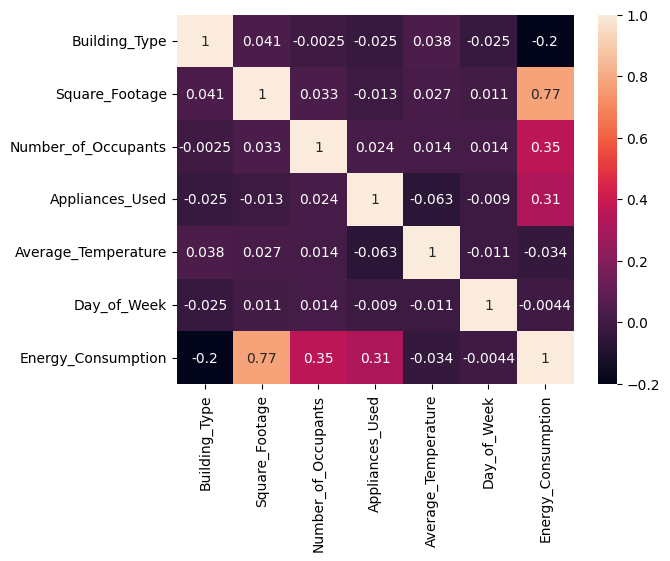

In [9]:
sns.heatmap(data=corr_matrix,annot=True)

#### Scatter plot

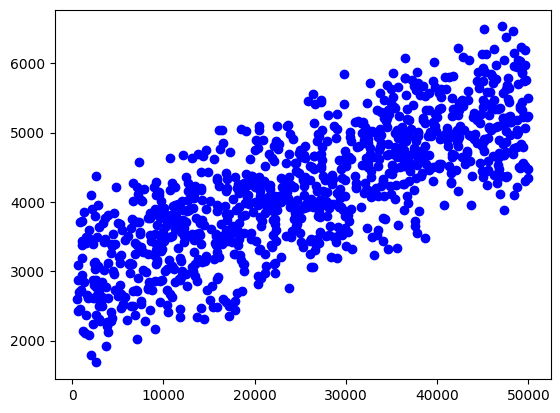

In [10]:
#Plotting
plt.scatter(df['Square_Footage'],df['Energy_Consumption'],color='blue')
plt.show()

#### Selection of Independent and Dependant Variables

In [11]:
x=df.iloc[:,0:6].values
x=pd.DataFrame(x)
print(x)
y=df.iloc[:,6].values
y=pd.DataFrame(y)
print(y)

       0        1     2     3      4    5
0    2.0   7063.0  76.0  10.0  29.84  0.0
1    0.0  44372.0  66.0  45.0  16.72  0.0
2    1.0  19255.0  37.0  17.0  14.30  1.0
3    2.0  13265.0  14.0  41.0  32.82  0.0
4    0.0  13375.0  26.0  18.0  11.92  0.0
..   ...      ...   ...   ...    ...  ...
995  2.0  14419.0  68.0  44.0  23.95  1.0
996  1.0  12194.0   7.0  22.0  14.67  1.0
997  0.0  39562.0  88.0  20.0  32.18  0.0
998  2.0   8348.0  67.0  37.0  16.48  1.0
999  0.0  15813.0  57.0  11.0  31.40  1.0

[1000 rows x 6 columns]
           0
0    2713.95
1    5744.99
2    4101.24
3    3009.14
4    3279.17
..       ...
995  3661.21
996  3546.34
997  5147.21
998  3244.98
999  3423.63

[1000 rows x 1 columns]


#### Spliting variables in to Test and Train

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#### Fitting to Model

In [13]:
model=LinearRegression()
model.fit(x_test,y_test)

LinearRegression()

#### Model Predictions

In [14]:
y_pred=model.predict(x_test)
print(y_test)
print(y_pred)

           0
993  2883.63
859  5147.11
298  5332.10
553  3027.78
672  4254.59
..       ...
679  4314.56
722  5438.11
215  4600.30
653  4518.12
150  4805.22

[200 rows x 1 columns]
[[3112.32128571]
 [5382.43922976]
 [4836.05438789]
 [3247.32115934]
 [4506.5850319 ]
 [5200.59771572]
 [5132.20080053]
 [4847.59776712]
 [5331.27125879]
 [5450.93124313]
 [4085.65875861]
 [3071.62192845]
 [3145.67634331]
 [4116.18704047]
 [5963.71206557]
 [4912.24977835]
 [2856.98029122]
 [3930.5752444 ]
 [5197.24316784]
 [4887.87318126]
 [4912.45864783]
 [4870.3121256 ]
 [3911.64993286]
 [5154.68099002]
 [4629.11425904]
 [3507.76603554]
 [3918.06328274]
 [2899.43209358]
 [5331.53051746]
 [5955.5331873 ]
 [4874.65553278]
 [4604.86228129]
 [4686.64155785]
 [4047.0980391 ]
 [2849.90267221]
 [3626.28081871]
 [3020.1259973 ]
 [5371.42922999]
 [3837.71141377]
 [2662.10589849]
 [3466.82743019]
 [3049.49684325]
 [4175.73672614]
 [4098.11080762]
 [3047.2617962 ]
 [3825.53500791]
 [3841.27162838]
 [3629.65832635]
 [25

#### Error Metrics for Model Evaluation

In [15]:
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 308.0726107310061
mean squared error: 115527.10449762206
root mean squared error: 339.89278382693277


#### Prediction Accuracy

In [16]:
score=r2_score(y_test,y_pred)
print("r2 score is:",score*100,"%")

r2 score is: 87.56019581975134 %


Conclusion:
The Linear Regression model achieved an R² score of 87.56%, indicating a strong correlation between the input features and energy consumption. The model's mean absolute error (MAE) of 308.07 and root mean squared error (RMSE) of 339.89 suggest good prediction accuracy. These results demonstrate the model's effectiveness in predicting energy consumption, which could be valuable for optimizing energy usage and reducing costs. Future enhancements could include experimenting with other machine learning models, feature engineering, and fine-tuning hyperparameters to further improve the model's performance.